# Data Preprocessing

In [1]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install datasets --quiet

## Imports

In [2]:
import pandas as pd
import numpy as np

from datasets import load_dataset

# set some pandas options to make the output more readable
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 5000)
pd.set_option('display.max_colwidth', None)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [3]:
datasets = load_dataset("OpenAssistant/oasst1")

Found cached dataset parquet (/home/jovyan/.cache/huggingface/datasets/OpenAssistant___parquet/OpenAssistant--oasst1-2960c57d7e52ab15/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 2/2 [00:00<00:00, 286.41it/s]


In [4]:
df_train = datasets["train"].to_pandas()
df_test = datasets["validation"].to_pandas()
df = pd.concat([df_train, df_test])

In [5]:
df.head()

,message_id,parent_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,rank,synthetic,model_name,detoxify,message_tree_id,tree_state,emojis,labels
0,6ab24d72-0181-4594-a9cd-deaf170242fb,None,c3fe8c76-fc30-4fa7-b7f8-c492f5967d18,2023-02-05T14:23:50.983374+00:00,"Can you write a short introduction about the relevance of the term ""monopsony"" in economics? Please use examples related to potential monopsonies in the labour market and cite relevant research.",prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.00044308538781479, 'severe_toxicity': 3.252684837207198e-05, 'obscene': 0.00023475120542570949, 'identity_attack': 0.0001416115992469713, 'insult': 0.00039489680784754455, 'threat': 4.075629112776369e-05, 'sexual_explicit': 2.712695459194947e-05}",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_reply', '_skip_ranking'], 'count': [10, 1, 4]}","{'name': ['spam', 'lang_mismatch', 'pii', 'not_appropriate', 'hate_speech', 'sexual_content', 'quality', 'toxicity', 'humor', 'creativity', 'violence'], 'value': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9166666666666666, 0.16666666666666666, 0.3333333333333333, 0.6666666666666666, 0.0], 'count': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]}"
1,c8e83833-ecbc-44fe-b6db-735228c25a1c,6ab24d72-0181-4594-a9cd-deaf170242fb,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T13:50:44.657083+00:00,"""Monopsony"" refers to a market structure where there is only one buyer for a particular good or service. In economics, this term is particularly relevant in the labor market, where a monopsony employer has significant power over the wages and working conditions of their employees. The presence of a monopsony can result in lower wages and reduced employment opportunities for workers, as the employer has little incentive to increase wages or provide better working conditions.\n\nRecent research has identified potential monopsonies in industries such as retail and fast food, where a few large companies control a significant portion of the market (Bivens & Mishel, 2013). In these industries, workers often face low wages, limited benefits, and reduced bargaining power, leading to a situation where they are dependent on the employer for their livelihood. This dependence can result in further suppression of wages and a decline in working conditions.\n\nOverall, the concept of monopsony is essential to understanding the dynamics of labor markets and the impact of market power on workers. Further research is needed to understand the extent and impact of monopsonies on the economy and to develop policies to address this issue.\n\nReferences:\nBivens, J., & Mishel, L. (2013). The Pay of Corporate Executives and Financial Professionals as Evidence of Rents in Top 1 Percent Incomes. Journal of Economic Perspectives, 27(3), 57-78.",assistant,en,3,True,False,0.0,False,None,"{'toxicity': 0.00026396565954200923, 'severe_toxicity': 2.7454958399175666e-05, 'obscene': 0.00013584605767391622, 'identity_attack': 9.263094398193061e-05, 'insult': 0.0001668655313551426, 'threat': 3.769186878344044e-05, 'sexual_explicit': 2.500762275303714e-05}",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_labeling'], 'count': [3, 1]}","{'name': ['spam', 'fails_task', 'lang_mismatch', 'pii', 'not_appropriate', 'hate_speech', 'sexual_content', 'quality', 'toxicity', 'humor', 'helpfulness', 'creativity', 'violence'], 'value': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9166666666666666, 0.375, 0.375, 0.75, 0.375, 0.0], 'count': [3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]}"
2,6708c47f-05c9-4346-b3d2-40b2bd24fde4,c8e83833-ecbc-44fe-b6db-735228c25a1c,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T18:48:49.391686+00:00,Now explain it to a dog,prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.03648477792739868, 'severe_toxicity': 5.486844383995049e-05, 'obscene': 0.0003762090636882931, 'identity_attack': 0.0002415566414128989, 'insult': 0.013612336479127407, 'threat': 0.0017075861105695

## Analyse Data

### Messages

In [6]:
print(f"There are {len(df)} messages in the dataset")

There are 88838 messages in the dataset


### Conversation Trees

In [7]:
print(f"There are {len(df.message_tree_id.unique())} conversation trees in the dataset")

There are 10364 conversation trees in the dataset


### Review Count

In [8]:
print(f"There are {df.review_count.sum()} ratings captured in the dataset")

There are 268961 ratings captured in the dataset


<Axes: xlabel='review_count'>

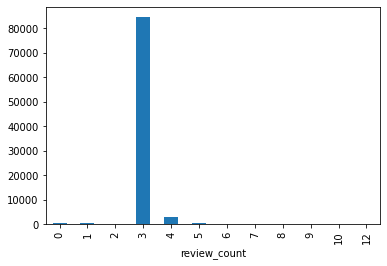

In [9]:
df.review_count.value_counts().sort_index().plot(kind='bar')

In [10]:
df.review_count.value_counts().sort_index()

review_count
0       286
1       272
2       175
3     84626
4      3064
5       330
6        60
7        17
8         2
9         2
10        3
12        1
Name: count, dtype: int64

### Language

In [11]:
print(f"There are {len(df.lang.unique())} different languages in the dataset")

There are 25 different languages in the dataset


<Axes: xlabel='lang'>

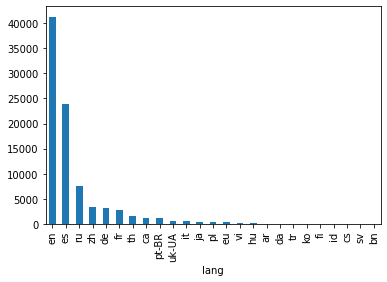

In [12]:
df.lang.value_counts().plot(kind='bar')

In [13]:
df.lang.value_counts()

lang
en       41305
es       23975
ru        7611
zh        3448
de        3195
fr        2653
th        1560
ca        1238
pt-BR     1203
uk-UA      640
it         570
ja         379
pl         304
eu         266
vi         199
hu          87
ar          56
da          44
tr          37
ko          24
fi          18
id          12
cs          12
sv           1
bn           1
Name: count, dtype: int64

In [14]:
df.lang.value_counts()['en']/len(df)

0.4649474324050519

### Humor

In [15]:
def get_humor_value(x):
    if not x:
        return 0
    
    index_of_humor = np.where(x['name'] == 'humor')[0]
    if len(index_of_humor) > 0:
        return x['value'][index_of_humor[0]]
    
    return 0

df['humor'] = df['labels'].apply(get_humor_value)

array([[<Axes: title={'center': 'humor'}>]], dtype=object)

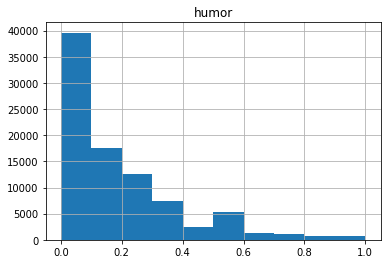

In [16]:
df.hist(column='humor')

In [17]:
df.humor.value_counts(bins=10, sort=False)

humor
(-0.002, 0.1]    39785
(0.1, 0.2]       17615
(0.2, 0.3]       12446
(0.3, 0.4]        7385
(0.4, 0.5]        6624
(0.5, 0.6]        1130
(0.6, 0.7]        1355
(0.7, 0.8]        1170
(0.8, 0.9]         630
(0.9, 1.0]         698
Name: count, dtype: int64